In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv(r"C:\Users\asnav\OneDrive\Documents\MachineLearningProjects\Kodbud\ipl\matches.csv")

In [44]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               755 non-null    int64 
 1   season           755 non-null    int64 
 2   city             748 non-null    object
 3   date             755 non-null    object
 4   team1            755 non-null    object
 5   team2            755 non-null    object
 6   toss_winner      755 non-null    object
 7   toss_decision    755 non-null    object
 8   result           755 non-null    object
 9   dl_applied       755 non-null    int64 
 10  winner           751 non-null    object
 11  win_by_runs      755 non-null    int64 
 12  win_by_wickets   755 non-null    int64 
 13  player_of_match  751 non-null    object
 14  venue            755 non-null    object
 15  umpire1          753 non-null    object
 16  umpire2          753 non-null    object
 17  umpire3          118 non-null    ob

In [46]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,755.000000,755.000000,755.000000,755.000000,755.000000
mean,1779.433113,2013.437086,0.025166,13.299338,3.354967
std,3448.993305,3.363039,0.156732,23.482437,3.388009
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.500000,2011.000000,0.000000,0.000000,0.000000
50%,378.000000,2013.000000,0.000000,0.000000,4.000000
75%,566.500000,2016.000000,0.000000,19.000000,6.000000
max,11414.000000,2019.000000,1.000000,146.000000,10.000000


In [47]:
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [48]:
df['city'] = df['city'].fillna(df['venue'])

In [49]:
df['winner'] = df['winner'].fillna('No Result')

In [50]:
df['player_of_match'] = df['player_of_match'].fillna('No Award')

In [51]:
df['umpire1'] = df['umpire1'].fillna('Unknown')

In [52]:
df['umpire2'] = df['umpire2'].fillna('Unknown')

In [53]:
df = df.drop(columns=['umpire3'])

In [54]:
df.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

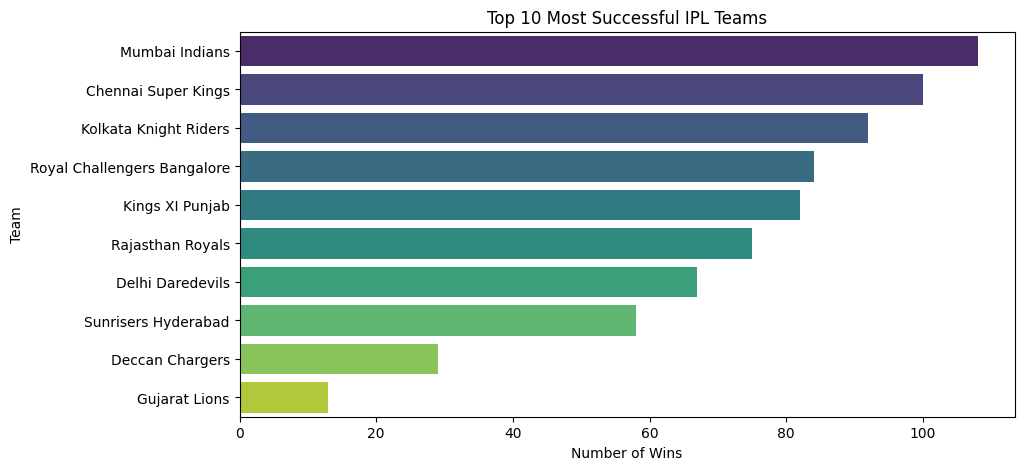

In [55]:
# most matches overall

wins = df['winner'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=wins.values, y=wins.index, hue=wins.index, palette='viridis', legend=False)
plt.title('Top 10 Most Successful IPL Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Team')
plt.show()


In [56]:
# Toss Decision Impact

toss_win_match_win = (df['toss_winner'] == df['winner']).sum()
toss_win_total = df['toss_winner'].count()

print("Teams winning toss and match:", toss_win_match_win)
print("Percentage:", round((toss_win_match_win / toss_win_total) * 100, 2), "%")


Teams winning toss and match: 392
Percentage: 51.92 %


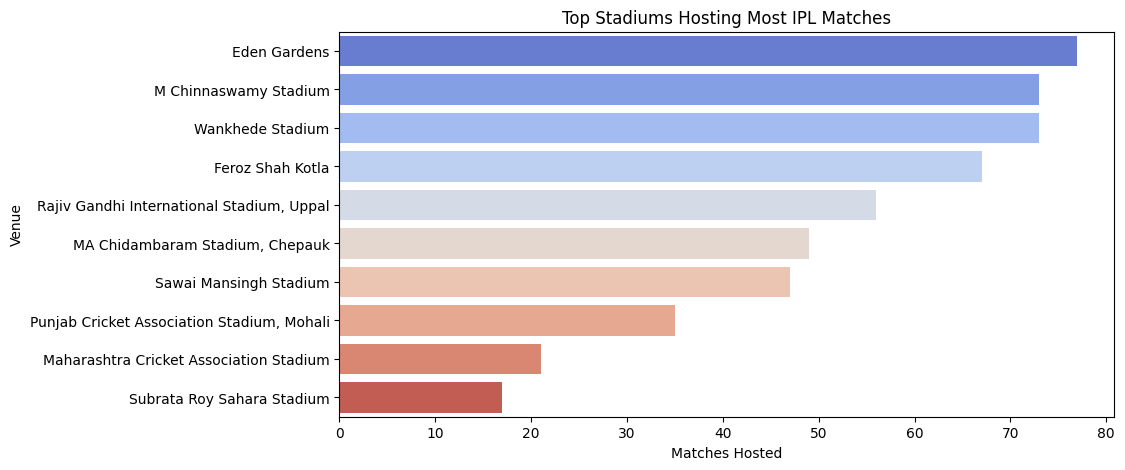

In [57]:
# Stadium Trends

venues = df['venue'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=venues.values, y=venues.index, hue=venues.index, palette='coolwarm', legend=False)
plt.title('Top Stadiums Hosting Most IPL Matches')
plt.xlabel('Matches Hosted')
plt.ylabel('Venue')
plt.show()

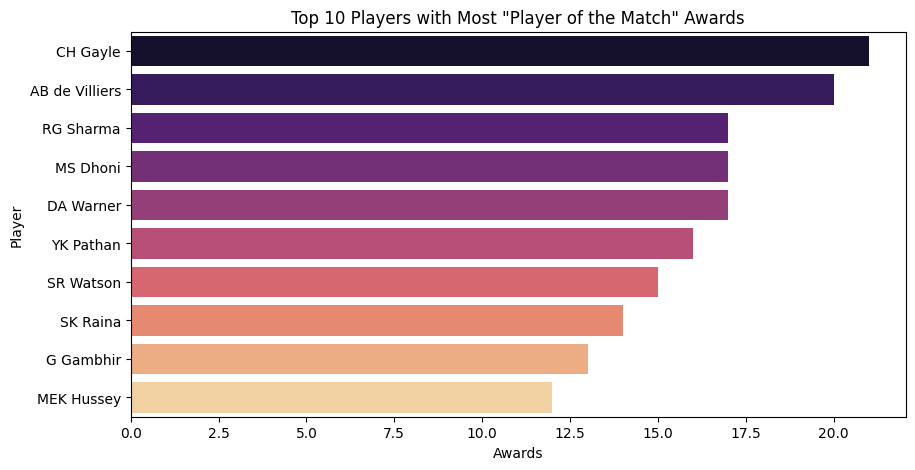

In [58]:
# Top Player of the Match Winners

players = df['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=players.values, y=players.index, hue=players.index, palette='magma', legend=False)
plt.title('Top 10 Players with Most "Player of the Match" Awards')
plt.xlabel('Awards')
plt.ylabel('Player')
plt.show()

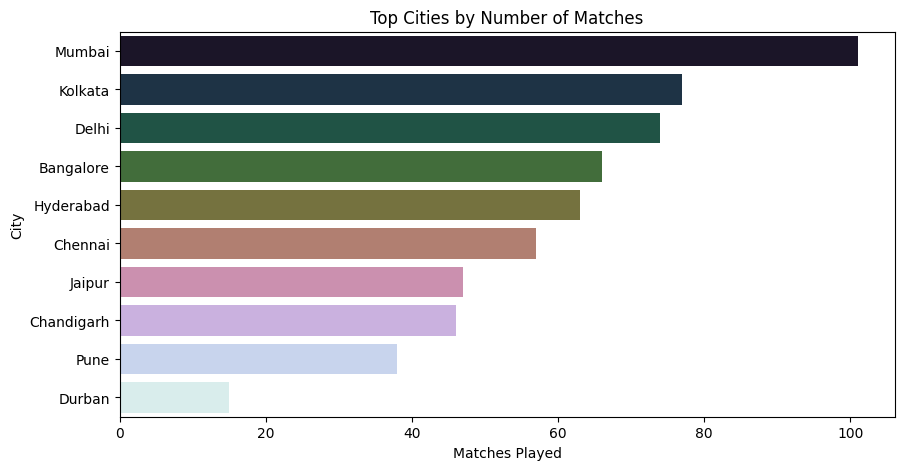

In [59]:
# Wins by City

city_wins = df['city'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city_wins.values, y=city_wins.index,hue=city_wins.index, palette='cubehelix', legend=False)
plt.title('Top Cities by Number of Matches')
plt.xlabel('Matches Played')
plt.ylabel('City')
plt.show()
